In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/Colab Notebooks/Test"


Healthy  Powdery  Rust


In [3]:
!pip install tensorflow


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plant_images_dir = '/content/drive/MyDrive/Colab Notebooks/Test'
datagen = ImageDataGenerator(
    rescale=2./255,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    plant_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    plant_images_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


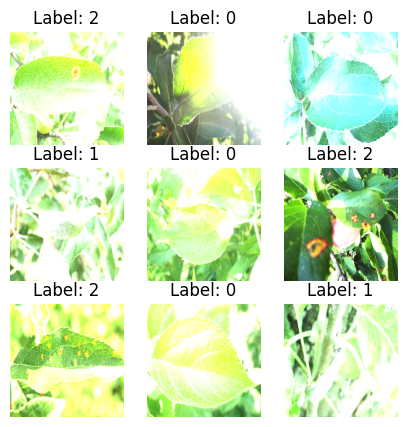

In [7]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i].argmax()}')
    plt.axis('off')
plt.show()


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 89s 12s/step - accuracy: 0.3454 - loss: 20.5607 - val_accuracy: 0.3333 - val_loss: 15.9699
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.3176 - loss: 11.4905 - val_accuracy: 0.3333 - val_loss: 1.2995
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4459 - loss: 1.1139 - val_accuracy: 0.4667 - val_loss: 1.0479
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.5797 - loss: 0.8297 - val_accuracy: 0.5000 - val_loss: 0.9169
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7563 - loss: 0.6377 - val_accuracy: 0.5333 - val_loss: 1.1563
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8687 - loss: 0.5814 - val_accuracy: 0.7000 - val_loss: 0.8678
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9911 - loss: 0.3284 - val_accuracy: 0.8000 - val_loss: 0.7466
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9137 - loss: 0.2481 - val_accuracy: 0.5667 - val_loss: 1.1407
Epoch 9/10
4/4 

In [8]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6333 - loss: 1.0078
Validation Accuracy: 0.6333


In [9]:
y_pred = model.predict(validation_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = validation_generator.classes


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [10]:
!pip install scikit-learn


In [11]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.30      0.35        10
           1       0.36      0.50      0.42        10
           2       0.33      0.30      0.32        10

    accuracy                           0.37        30
   macro avg       0.37      0.37      0.36        30
weighted avg       0.37      0.37      0.36        30

